<a href="https://colab.research.google.com/github/krishna251199/Xchange/blob/master/Ur_Case_vs_Control_Trimester_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os,shutil
import pandas as pd
import keras
from keras.layers import *
from keras import models
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.models import load_model

**Train Data**

In [ ]:
path="/content/drive/MyDrive/Case vs Control Third without split"
train=os.listdir(path)
print(train)
#print("Training Data:- ")
for f in train:
  path="/content/drive/MyDrive/Case vs Control Third without split/"+f
  print(f+ " "+ str(len(os.listdir(path))))

['Control', 'Case']
Control 481
Case 138


In [ ]:

from keras.preprocessing.image import ImageDataGenerator

#Data Agumentation
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
valid_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

batch_size=8
train_generator=train_datagen.flow_from_directory(
    "/content/drive/MyDrive/Case vs Control Third without split/",
    target_size=(224,224),
    batch_size=batch_size,
    class_mode='binary'
)



Found 619 images belonging to 2 classes.


In [ ]:
from keras.utils import load_img, img_to_array
path="/content/drive/MyDrive/Case vs Control Third without split"
train=os.listdir(path)
print(train)
image_data_train=[]
label_train=[]
for f in train:
  path="/content/drive/MyDrive/Case vs Control Third without split/"+f+'/'
  entries=os.listdir(path)
  for entry in entries:
      if f=='Case':
        label=0
      else:
        label=1
      image=load_img(path+entry,target_size=(224,224,3))
      image_array=img_to_array(image)/255.0
      image_data_train.append(image_array)
      label_train.append(label)

image_data_train=np.array(image_data_train)
label_train=np.array(label_train)

print(image_data_train.shape)
#print(len(label_test))

['Control', 'Case']
(619, 224, 224, 3)


In [ ]:
import sklearn.model_selection as sk

x_train, X_test, y1_train, y_test =  sk.train_test_split(image_data_train,label_train,test_size=0.15, random_state = 42)

In [ ]:
X_train, X_valid, y_train, y_valid =  sk.train_test_split(x_train,y1_train,test_size=0.17, random_state = 42)

In [ ]:
for x,y in train_generator:
  print(x.shape)
  print(y.shape)
  break

(8, 224, 224, 3)
(8,)


In [ ]:
train_generator.class_indices

{'Case': 0, 'Control': 1}

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

# **Resnet 50**

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = ResNet50(input_shape=(224, 224,3), include_top=False, weights="imagenet", pooling='max')

for layer in base_model.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
from tensorflow.keras import layers 
from tensorflow.keras import Model

Epoch 1/100
1/1 [==============================] - 29s 29s/step - loss: 3.0603 - acc: 0.6216 - val_loss: 2.7424 - val_acc: 0.2111
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 3.9243 - acc: 0.2317 - val_loss: 1.0453 - val_acc: 0.2111
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 2.1619 - acc: 0.4266 - val_loss: 0.5941 - val_acc: 0.7778
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 2.2273 - acc: 0.5780 - val_loss: 0.5412 - val_acc: 0.7889
Epoch 5/100
1/1 [==============================] - 2s 2s/step - loss: 2.2683 - acc: 0.6170 - val_loss: 0.6091 - val_acc: 0.8000
Epoch 6/100
1/1 [==============================] - 2s 2s/step - loss: 1.8164 - acc: 0.5872 - val_loss: 0.7688 - val_acc: 0.2222
Epoch 7/100
1/1 [==============================] - 2s 2s/step - loss: 1.8392 - acc: 0.4794 - val_loss: 0.7401 - val_acc: 0.3111
Epoch 8/100
1/1 [==============================] - 1s 1s/step - loss: 1.7798 - acc: 0.5069 - val_loss:

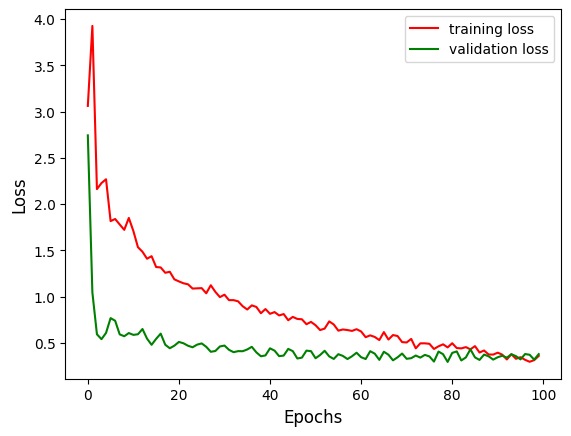

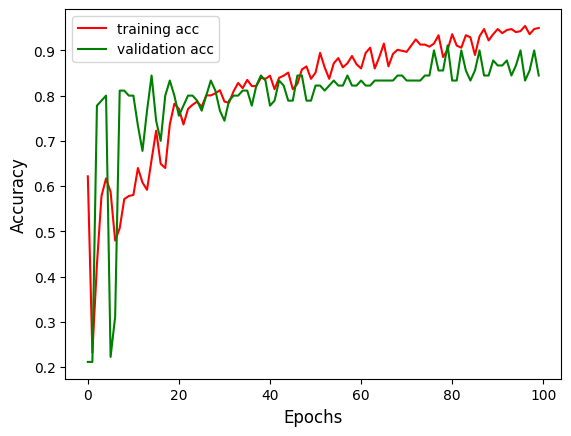

3/3 [==============================] - 2s 626ms/step
confusion Matrix:
[[19  4]
 [ 6 64]]
**********************************************
Classification Report:
              precision    recall  f1-score   support

        Case       0.76      0.83      0.79        23
     Control       0.94      0.91      0.93        70

    accuracy                           0.89        93
   macro avg       0.85      0.87      0.86        93
weighted avg       0.90      0.89      0.89        93

**********************************************
Accuracy Score : 0.8924731182795699
**********************************************
F1 Score : 0.9275362318840579
**********************************************
Class Wise Accuracy :
Case Accuracy : 82.6086956521739
Control Accuracy : 91.42857142857143
**********************************************
ROC_AUC Score: 0.8701863354037267
**********************************************
Cohen_kappa score: 0.7193723596861799


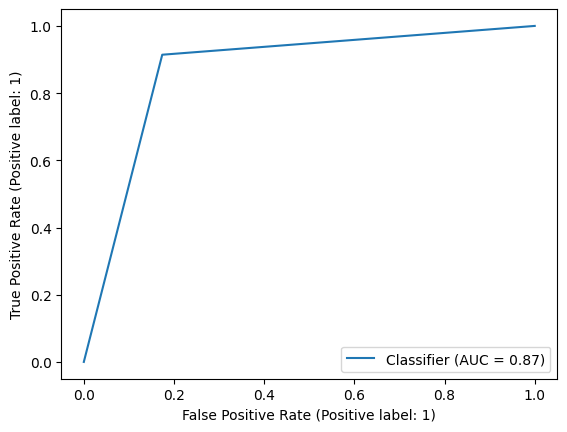

In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(108, activation='relu')(x)
x = layers.Dense(54, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x)




 
model = tf.keras.models.Model(base_model.input, x)
class_weight = {0: 5.9, 1: 1.4} 
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'binary_crossentropy',metrics = ['acc'])
Resnethist = model.fit(X_train,y_train, validation_data=(X_valid,y_valid), steps_per_epoch = 1,  epochs = 100, shuffle=True,class_weight = class_weight)


# #plt.style.use("seaborn")
plt.plot(Resnethist.history['loss'],label="training loss",c='red')
plt.plot(Resnethist.history['val_loss'],label="validation loss",c='green')
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
# plt.ylim(0.3,1.4)
plt.legend()
plt.show()

# #plt.style.use("seaborn")
plt.plot(Resnethist.history['acc'],label="training acc",c='red')
plt.plot(Resnethist.history['val_acc'],label="validation acc",c='green')
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.show()

Y_pred_res = model.predict(X_test)
Y_pred=[]
Y_pred_res=list(Y_pred_res)
for res in Y_pred_res:
  if res>0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)
y_pred=np.array(Y_pred)

#Confution Matrix and Classification Report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score

print("confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
print("**********************************************")
print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Case','Control'])) 
print("**********************************************")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("**********************************************")
print("F1 Score :",f1_score(y_test, y_pred))
print("**********************************************")
print("Class Wise Accuracy :")
cm=confusion_matrix(y_test, y_pred)
cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
class_wise_acc=cm.diagonal()
print("Case Accuracy :", class_wise_acc[0]*100)
print("Control Accuracy :", class_wise_acc[1]*100)
print("**********************************************")
r_score=roc_auc_score(y_test, y_pred, average=None)
print("ROC_AUC Score:",r_score)
print("**********************************************")
RocCurveDisplay.from_predictions(y_test, y_pred)
cohen_score = cohen_kappa_score(y_test, y_pred)
print("Cohen_kappa score:",cohen_score)

In [ ]:
%cd /content/drive/MyDrive/Capstone_case_vs_Control_data/

/content/drive/MyDrive/Capstone_case_vs_Control_data


In [ ]:
df = pd.DataFrame({'loss' : Resnethist.history["loss"],
                                'val_loss' : Resnethist.history["val_loss"],
                                'accuracy' : Resnethist.history["acc"],
                               "val_accuracy": Resnethist.history["val_acc"] }, 
                                columns=['loss','val_loss', 'accuracy', "val_accuracy"])
df.head()
df.to_csv('Resnethist_3.csv')


# **VGG 16**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras import layers 
from tensorflow.keras import Model

base_model = VGG16(input_shape=(224, 224,3), include_top=False, weights="imagenet")

for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.6)(x)
x = layers.Dense(20, activation='relu')(x)
x = layers.Dense(1,activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.00001), loss = 'binary_crossentropy',metrics = ['acc'])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
class_weight = {0: 5.9, 1: 1.4}
vgghist = model.fit(X_train,y_train, validation_data= (X_valid,y_valid), steps_per_epoch = 1,batch_size=300, epochs = 200, shuffle=True,class_weight = class_weight)
#Here 194 train Data size and 32 Test Data size

Epoch 1/200
1/1 [==============================] - 53s 53s/step - loss: 1.7931 - acc: 0.3867 - val_loss: 0.6075 - val_acc: 0.8000
Epoch 2/200
1/1 [==============================] - 16s 16s/step - loss: 1.6439 - acc: 0.4853 - val_loss: 0.5799 - val_acc: 0.7778
Epoch 3/200
1/1 [==============================] - 2s 2s/step - loss: 1.5690 - acc: 0.5667 - val_loss: 0.5805 - val_acc: 0.8111
Epoch 4/200
1/1 [==============================] - 1s 1s/step - loss: 1.6295 - acc: 0.5147 - val_loss: 0.5798 - val_acc: 0.8333
Epoch 5/200
1/1 [==============================] - 2s 2s/step - loss: 1.5017 - acc: 0.5800 - val_loss: 0.5609 - val_acc: 0.8333
Epoch 6/200
1/1 [==============================] - 1s 1s/step - loss: 1.4433 - acc: 0.6029 - val_loss: 0.5588 - val_acc: 0.8889
Epoch 7/200
1/1 [==============================] - 2s 2s/step - loss: 1.4818 - acc: 0.6200 - val_loss: 0.5676 - val_acc: 0.8667
Epoch 8/200
1/1 [==============================] - 1s 1s/step - loss: 1.3390 - acc: 0.6103 - val_los

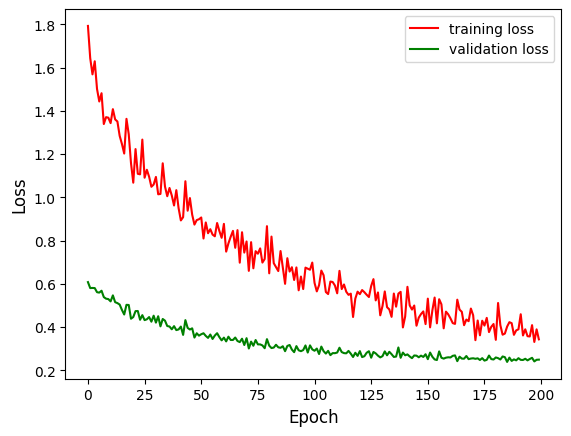

In [ ]:

y1 = vgghist.history["loss"]
y2 = vgghist.history["val_loss"]

#plt.style.use("seaborn")
plt.plot(vgghist.history['loss'],label="training loss",c='red')
plt.plot(vgghist.history['val_loss'],label="validation loss",c='green')
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
#plt.plot(smooth(y1,10), 'r-', lw=2)
#plt.plot(smooth(y2,10), 'g-', lw=2)
# plt.ylim(0.1,1.0)
plt.legend()
plt.show()

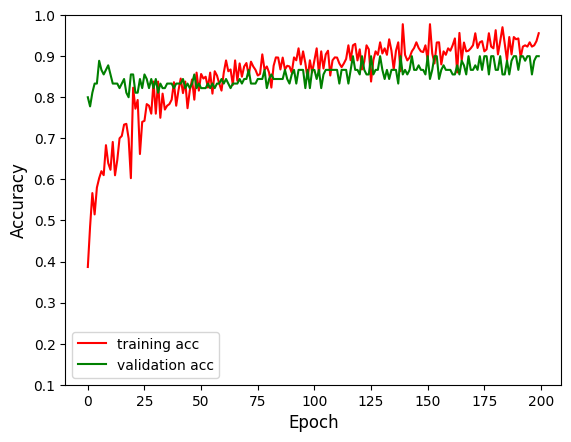

In [ ]:
#plt.style.use("seaborn")
plt.plot(vgghist.history['acc'],label="training acc",c='red')
plt.plot(vgghist.history['val_acc'],label="validation acc",c='green')
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0.1,1.0)
plt.legend()
plt.show()

3/3 [==============================] - 9s 2s/step
confusion Matrix:
[[17  6]
 [ 4 66]]
**********************************************
Classification Report:
              precision    recall  f1-score   support

 Trimester 1       0.81      0.74      0.77        23
 Trimester 2       0.92      0.94      0.93        70

    accuracy                           0.89        93
   macro avg       0.86      0.84      0.85        93
weighted avg       0.89      0.89      0.89        93

**********************************************
Accuracy Score : 0.8924731182795699
**********************************************
F1 Score : 0.9295774647887323
**********************************************
Class Wise Accuracy :
Case Accuracy : 73.91304347826086
Control Accuracy : 94.28571428571428
**********************************************
ROC_AUC Score: 0.8409937888198757
**********************************************
Cohen_kappa score: 0.7024952015355086


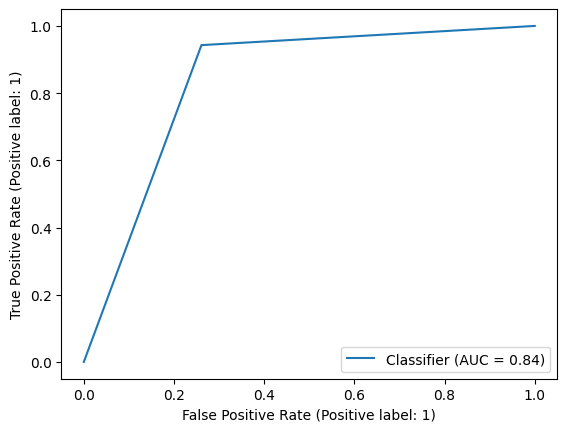

In [ ]:
Y_pred_res = model.predict(X_test)
Y_pred=[]
Y_pred_res=list(Y_pred_res)
for res in Y_pred_res:
  if res>0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)
y_pred=np.array(Y_pred)

#Confution Matrix and Classification Report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score

print("confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
print("**********************************************")
print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Trimester 1','Trimester 2'])) 
print("**********************************************")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("**********************************************")
print("F1 Score :",f1_score(y_test, y_pred))
print("**********************************************")
print("Class Wise Accuracy :")
cm=confusion_matrix(y_test, y_pred)
cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
class_wise_acc=cm.diagonal()
print("Case Accuracy :", class_wise_acc[0]*100)
print("Control Accuracy :", class_wise_acc[1]*100)
print("**********************************************")
r_score=roc_auc_score(y_test, y_pred, average=None)
print("ROC_AUC Score:",r_score)
print("**********************************************")
RocCurveDisplay.from_predictions(y_test, y_pred)
cohen_score = cohen_kappa_score(y_test, y_pred)
print("Cohen_kappa score:",cohen_score)

#**Efficient Net**

In [ ]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 3.6 MB/s eta 0:00:00


In [ ]:
import efficientnet.keras as efn

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras import layers 
from tensorflow.keras import Model

base_model = efn.EfficientNetB0(input_shape=(224, 224,3), include_top=False, weights="imagenet")

for layer in base_model.layers:
    layer.trainable = False

16804768/16804768 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import optimizers

In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.8)(x)
x = layers.Dense(1, activation='sigmoid')(x) #output
class_weight = {0: 5.9, 1: 1.4}
model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = optimizers.RMSprop(learning_rate=0.000001), loss = 'binary_crossentropy',metrics = ['acc'])

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 112, 112, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 112, 112, 32  128         ['stem_conv[0][0]']              
                                )                                                           

In [ ]:
EnetB0hist = model.fit(X_train,y_train, validation_data = (X_valid,y_valid), steps_per_epoch = 1, epochs = 200,class_weight=class_weight)


Epoch 1/200
1/1 [==============================] - 21s 21s/step - loss: 2.3612 - acc: 0.6261 - val_loss: 0.5841 - val_acc: 0.7778
Epoch 2/200
1/1 [==============================] - 1s 1s/step - loss: 2.1879 - acc: 0.6009 - val_loss: 0.5903 - val_acc: 0.7444
Epoch 3/200
1/1 [==============================] - 1s 1s/step - loss: 2.1380 - acc: 0.6216 - val_loss: 0.5949 - val_acc: 0.7556
Epoch 4/200
1/1 [==============================] - 1s 1s/step - loss: 2.3215 - acc: 0.5872 - val_loss: 0.6034 - val_acc: 0.7444
Epoch 5/200
1/1 [==============================] - 1s 1s/step - loss: 2.1338 - acc: 0.5849 - val_loss: 0.6046 - val_acc: 0.7444
Epoch 6/200
1/1 [==============================] - 1s 1s/step - loss: 1.9716 - acc: 0.5826 - val_loss: 0.6093 - val_acc: 0.7222
Epoch 7/200
1/1 [==============================] - 1s 1s/step - loss: 1.9620 - acc: 0.5963 - val_loss: 0.6082 - val_acc: 0.7222
Epoch 8/200
1/1 [==============================] - 1s 1s/step - loss: 1.9044 - acc: 0.6009 - val_loss:

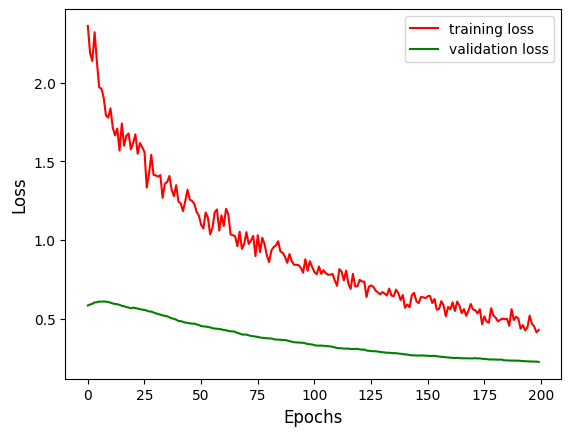

In [ ]:
#plt.style.use("seaborn")
plt.plot(EnetB0hist.history['loss'],label="training loss",c='red')
plt.plot(EnetB0hist.history['val_loss'],label="validation loss",c='green')
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
# plt.ylim(0,2)
plt.legend()
plt.show()

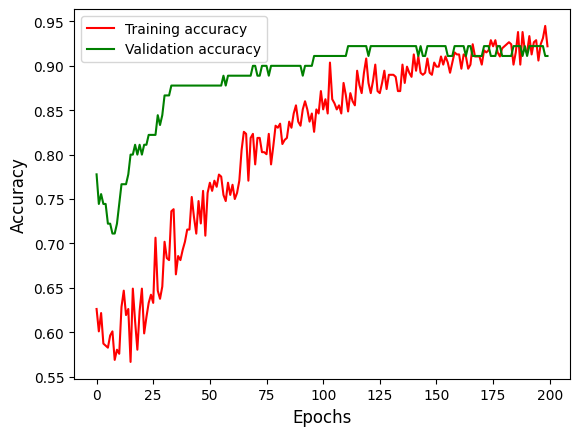

In [ ]:
#plt.style.use("seaborn")
#plt.plot(vgghist.history['acc'],label="training acc",c='red')
#plt.plot(vgghist.history['val_acc'],label="validation acc",c='green')

plt.plot(EnetB0hist.history['acc'],label="Training accuracy",c='red')
plt.plot(EnetB0hist.history['val_acc'],label="Validation accuracy",c='green')
y1 = EnetB0hist.history["acc"]
y2 = EnetB0hist.history["val_acc"]
#plt.style.use("seaborn")
#plt.plot(vgghist.history['loss'],label="training loss",c='red')
#plt.plot(vgghist.history['val_loss'],label="validation loss",c='green')
#plt.plot(smooth(y1,10), 'r-', lw=2)
#plt.plot(smooth(y2,10), 'g-', lw=2)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.show()

3/3 [==============================] - 3s 485ms/step
confusion Matrix:
[[16  7]
 [ 4 66]]
**********************************************
Classification Report:
              precision    recall  f1-score   support

        Case       0.80      0.70      0.74        23
     Control       0.90      0.94      0.92        70

    accuracy                           0.88        93
   macro avg       0.85      0.82      0.83        93
weighted avg       0.88      0.88      0.88        93

**********************************************
Accuracy Score : 0.8817204301075269
**********************************************
F1 Score : 0.923076923076923
**********************************************
Class Wise Accuracy :
Case Accuracy : 69.56521739130434
Control Accuracy : 94.28571428571428
**********************************************
ROC_AUC Score: 0.819254658385093
**********************************************
Cohen_kappa score: 0.6677492692432608


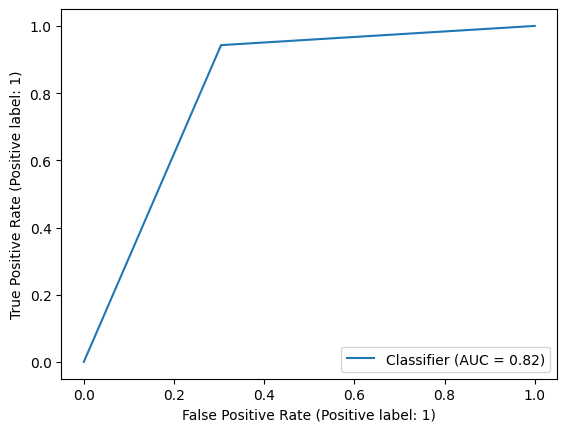

In [ ]:
Y_pred_res = model.predict(X_test)
Y_pred=[]
Y_pred_res=list(Y_pred_res)
for res in Y_pred_res:
  if res>0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)
y_pred=np.array(Y_pred)

#Confution Matrix and Classification Report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score

print("confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
print("**********************************************")
print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Case','Control'])) 
print("**********************************************")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("**********************************************")
print("F1 Score :",f1_score(y_test, y_pred))
print("**********************************************")
print("Class Wise Accuracy :")
cm=confusion_matrix(y_test, y_pred)
cm=cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
class_wise_acc=cm.diagonal()
print("Case Accuracy :", class_wise_acc[0]*100)
print("Control Accuracy :", class_wise_acc[1]*100)
print("**********************************************")
r_score=roc_auc_score(y_test, y_pred, average=None)
print("ROC_AUC Score:",r_score)
print("**********************************************")
RocCurveDisplay.from_predictions(y_test, y_pred)
cohen_score = cohen_kappa_score(y_test, y_pred)
print("Cohen_kappa score:",cohen_score)

# **Efficient Net B7**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras import layers 
from tensorflow.keras import Model

base_model = efn.EfficientNetB7(input_shape=(224, 224,3), include_top=False, weights="imagenet")

for layer in base_model.layers:
    layer.trainable = False

258434480/258434480 [==============================] - 2s 0us/step


In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
#x = layers.Dense(512, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x) #output

model = tf.keras.models.Model(base_model.input, x)
# model.compile(optimizer = optimizers.RMSprop(learning_rate=0.0006), loss = 'binary_crossentropy',metrics = ['acc'])

In [ ]:
model.compile(optimizer = optimizers.RMSprop(learning_rate=0.000001), loss = 'binary_crossentropy',metrics = ['acc'])

In [ ]:
class_weight = {0: 5.9, 1: 1.4}
EnetB7hist = model.fit(X_train,y_train, validation_data = (X_valid,y_valid), steps_per_epoch = 1, epochs = 100, shuffle=True,class_weight=class_weight)


Epoch 1/100
1/1 [==============================] - 39s 39s/step - loss: 2.0681 - acc: 0.5161 - val_loss: 0.8748 - val_acc: 0.3556
Epoch 2/100
1/1 [==============================] - 7s 7s/step - loss: 1.7907 - acc: 0.4587 - val_loss: 0.6838 - val_acc: 0.5667
Epoch 3/100
1/1 [==============================] - 7s 7s/step - loss: 1.8617 - acc: 0.5390 - val_loss: 0.7696 - val_acc: 0.4222
Epoch 4/100
1/1 [==============================] - 7s 7s/step - loss: 1.7530 - acc: 0.4862 - val_loss: 0.6927 - val_acc: 0.5333
Epoch 5/100
1/1 [==============================] - 7s 7s/step - loss: 1.6155 - acc: 0.5550 - val_loss: 0.6653 - val_acc: 0.5778
Epoch 6/100
1/1 [==============================] - 7s 7s/step - loss: 1.4737 - acc: 0.6651 - val_loss: 0.6524 - val_acc: 0.6333
Epoch 7/100
1/1 [==============================] - 7s 7s/step - loss: 1.5180 - acc: 0.6239 - val_loss: 0.6527 - val_acc: 0.6222
Epoch 8/100
1/1 [==============================] - 7s 7s/step - loss: 1.5832 - acc: 0.6032 - val_loss:

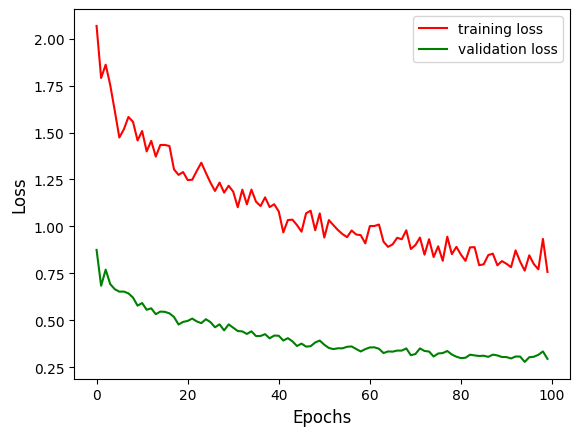

In [ ]:
#plt.style.use("seaborn")
plt.plot(EnetB7hist.history['loss'],label="training loss",c='red')
plt.plot(EnetB7hist.history['val_loss'],label="validation loss",c='green')
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
# plt.ylim(0.2,2.5)
plt.legend()
plt.show()

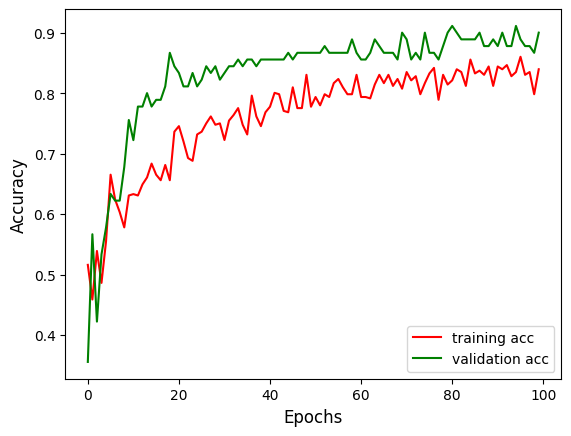

In [ ]:
#plt.style.use("seaborn")
plt.plot(EnetB7hist.history['acc'],label="training acc",c='red')
plt.plot(EnetB7hist.history['val_acc'],label="validation acc",c='green')
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.show()

3/3 [==============================] - 7s 1s/step
confusion Matrix:
[[17  6]
 [ 9 61]]
**********************************************
Classification Report:
              precision    recall  f1-score   support

        Case       0.65      0.74      0.69        23
     Control       0.91      0.87      0.89        70

    accuracy                           0.84        93
   macro avg       0.78      0.81      0.79        93
weighted avg       0.85      0.84      0.84        93

**********************************************
Accuracy Score : 0.8387096774193549
**********************************************
F1 Score : 0.8905109489051095
**********************************************
Class Wise Accuracy :
Case Accuracy : 73.91304347826086
Control Accuracy : 87.14285714285714
**********************************************
ROC_AUC Score: 0.80527950310559
**********************************************
Cohen_kappa score: 0.584944956858078


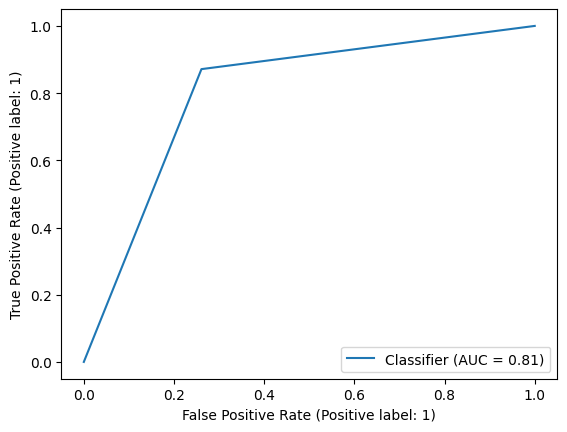

In [ ]:
Y_pred_res = model.predict(X_test)
Y_pred=[]
Y_pred_res=list(Y_pred_res)
for res in Y_pred_res:
  if res>0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)
y_pred=np.array(Y_pred)

#Confution Matrix and Classification Report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score

print("confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
print("**********************************************")
print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Case','Control'])) 
print("**********************************************")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("**********************************************")
print("F1 Score :",f1_score(y_test, y_pred))
print("**********************************************")
print("Class Wise Accuracy :")
cm=confusion_matrix(y_test, y_pred)
cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
class_wise_acc=cm.diagonal()
print("Case Accuracy :", class_wise_acc[0]*100)
print("Control Accuracy :", class_wise_acc[1]*100)
print("**********************************************")
r_score=roc_auc_score(y_test, y_pred, average=None)
print("ROC_AUC Score:",r_score)
print("**********************************************")
RocCurveDisplay.from_predictions(y_test, y_pred)
cohen_score = cohen_kappa_score(y_test, y_pred)
print("Cohen_kappa score:",cohen_score)

# **Inception**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras import layers 
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape = (224,224, 3), include_top = False, weights = 'imagenet')


for layer in base_model.layers:
    layer.trainable = False

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
#x = layers.Dense(100, activation='relu')(x)
#x = layers.Dense(20, activation='relu')(x)
x = layers.Dropout(0.6)(x)
x = layers.Dense(1, activation='sigmoid')(x) #output


model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.000001), loss = 'binary_crossentropy',metrics = ['acc'])

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                           

In [ ]:
class_weight = {0: 5.9, 1: 1.4}
Inceptionhist = model.fit(X_train,y_train, validation_data= (X_valid,y_valid), steps_per_epoch = 1, epochs = 100,class_weight=class_weight)


Epoch 1/100
1/1 [==============================] - 26s 26s/step - loss: 2.8383 - acc: 0.3073 - val_loss: 1.0438 - val_acc: 0.3111
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 2.4138 - acc: 0.4197 - val_loss: 0.9527 - val_acc: 0.3556
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 2.0201 - acc: 0.4908 - val_loss: 0.8624 - val_acc: 0.3778
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 2.1351 - acc: 0.4908 - val_loss: 0.8024 - val_acc: 0.4444
Epoch 5/100
1/1 [==============================] - 1s 1s/step - loss: 2.1504 - acc: 0.5161 - val_loss: 0.8026 - val_acc: 0.4444
Epoch 6/100
1/1 [==============================] - 1s 1s/step - loss: 2.0505 - acc: 0.5390 - val_loss: 0.7661 - val_acc: 0.4889
Epoch 7/100
1/1 [==============================] - 1s 1s/step - loss: 1.9157 - acc: 0.5596 - val_loss: 0.7338 - val_acc: 0.5111
Epoch 8/100
1/1 [==============================] - 1s 1s/step - loss: 1.8208 - acc: 0.5826 - val_loss:

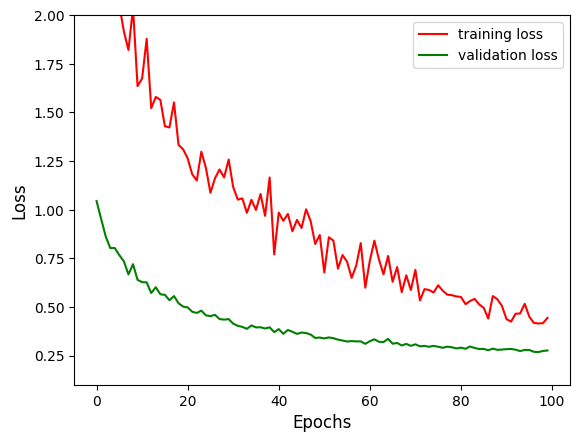

In [ ]:
#plt.style.use("seaborn")
plt.plot(Inceptionhist.history['loss'],label="training loss",c='red')
plt.plot(Inceptionhist.history['val_loss'],label="validation loss",c='green')
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.ylim(0.1,2)
plt.legend()
plt.show()

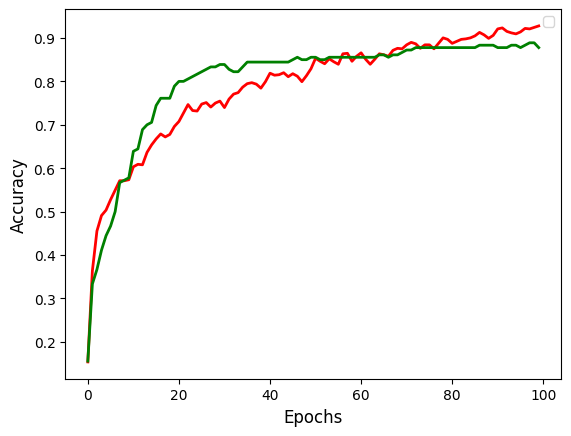

In [ ]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

y1 = Inceptionhist.history['acc']
y2 = Inceptionhist.history['val_acc']

#plt.style.use("seaborn")
#plt.plot(vgghist.history['loss'],label="training loss",c='red')
#plt.plot(vgghist.history['val_loss'],label="validation loss",c='green')
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.plot(smooth(y1,2), 'r-', lw=2)
plt.plot(smooth(y2,2), 'g-', lw=2)
plt.legend()
plt.show()

3/3 [==============================] - 3s 836ms/step
confusion Matrix:
[[19  4]
 [ 5 65]]
**********************************************
Classification Report:
              precision    recall  f1-score   support

        Case       0.79      0.83      0.81        23
     Control       0.94      0.93      0.94        70

    accuracy                           0.90        93
   macro avg       0.87      0.88      0.87        93
weighted avg       0.90      0.90      0.90        93

**********************************************
Accuracy Score : 0.9032258064516129
**********************************************
F1 Score : 0.935251798561151
**********************************************
Class Wise Accuracy :
Case Accuracy : 82.6086956521739
Control Accuracy : 92.85714285714286
**********************************************
ROC_AUC Score: 0.8773291925465839
**********************************************
Cohen_kappa score: 0.743801652892562


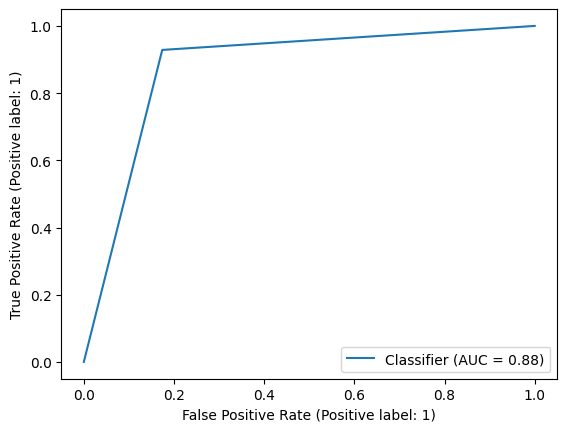

In [ ]:
Y_pred_res = model.predict(X_test)
Y_pred=[]
Y_pred_res=list(Y_pred_res)
for res in Y_pred_res:
  if res>0.5:
    Y_pred.append(1)
  else:
    Y_pred.append(0)
y_pred=np.array(Y_pred)

#Confution Matrix and Classification Report
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import cohen_kappa_score

print("confusion Matrix:")
print(confusion_matrix(y_test, y_pred)) 
print("**********************************************")
print("Classification Report:")
print(classification_report(y_test, y_pred,target_names=['Case','Control'])) 
print("**********************************************")
print("Accuracy Score :",accuracy_score(y_test, y_pred))
print("**********************************************")
print("F1 Score :",f1_score(y_test, y_pred))
print("**********************************************")
print("Class Wise Accuracy :")
cm=confusion_matrix(y_test, y_pred)
cm=cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
class_wise_acc=cm.diagonal()
print("Case Accuracy :", class_wise_acc[0]*100)
print("Control Accuracy :", class_wise_acc[1]*100)
print("**********************************************")
r_score=roc_auc_score(y_test, y_pred, average=None)
print("ROC_AUC Score:",r_score)
print("**********************************************")
RocCurveDisplay.from_predictions(y_test, y_pred)
cohen_score = cohen_kappa_score(y_test, y_pred)
print("Cohen_kappa score:",cohen_score)

vgg16 data

In [ ]:
%cd /content/drive/MyDrive/Capstone_case_vs_Control_data/

/content/drive/MyDrive/Capstone_case_vs_Control_data


In [ ]:
df = pd.DataFrame({'loss' : vgghist.history["loss"],
                                'val_loss' : vgghist.history["val_loss"],
                                'accuracy' : vgghist.history["acc"],
                               "val_accuracy": vgghist.history["val_acc"] }, 
                                columns=['loss','val_loss', 'accuracy', "val_accuracy"])
df.head()
df.to_csv('vgghist_3.csv')


efficient b0 data

In [ ]:
%cd /content/drive/MyDrive/Capstone_case_vs_Control_data/

/content/drive/MyDrive/Capstone_case_vs_Control_data


In [ ]:
df = pd.DataFrame({'loss' :EnetB0hist.history["loss"],
                                'val_loss' : EnetB0hist.history["val_loss"],
                                'accuracy' : EnetB0hist.history["acc"],
                               "val_accuracy": EnetB0hist.history["val_acc"] }, 
                                columns=['loss','val_loss', 'accuracy', "val_accuracy"])
df.head()
df.to_csv('EnetB0hist_3.csv')

efficient b7 data

In [ ]:
%cd /content/drive/MyDrive/Capstone_case_vs_Control_data/

/content/drive/MyDrive/Capstone_case_vs_Control_data


In [ ]:
df = pd.DataFrame({'loss' : EnetB7hist.history["loss"],
                                'val_loss' : EnetB7hist.history["val_loss"],
                                'accuracy' : EnetB7hist.history["acc"],
                               "val_accuracy": EnetB7hist.history["val_acc"] }, 
                                columns=['loss','val_loss', 'accuracy', "val_accuracy"])
df.head()
df.to_csv('EnetB7hist_3.csv')

Inception data

In [ ]:
%cd /content/drive/MyDrive/Capstone_case_vs_Control_data/

/content/drive/MyDrive/Capstone_case_vs_Control_data


In [ ]:
df = pd.DataFrame({'loss' : Inceptionhist.history["loss"],
                                'val_loss' : Inceptionhist.history["val_loss"],
                                'accuracy' : Inceptionhist.history["acc"],
                               "val_accuracy": Inceptionhist.history["val_acc"] }, 
                                columns=['loss','val_loss', 'accuracy', "val_accuracy"])
df.head()
df.to_csv('Inceptionhist_3.csv')
